#Predicting the Air Quality#

###Importing Libraries###

In [3]:
import pandas
import numpy as np

In [4]:
df=pandas.read_csv('Air_Quality.csv', encoding='unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
df.shape

(435742, 13)

In [7]:
df.keys()

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [8]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

###Data Visualization###

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'SO2 levels in various states')

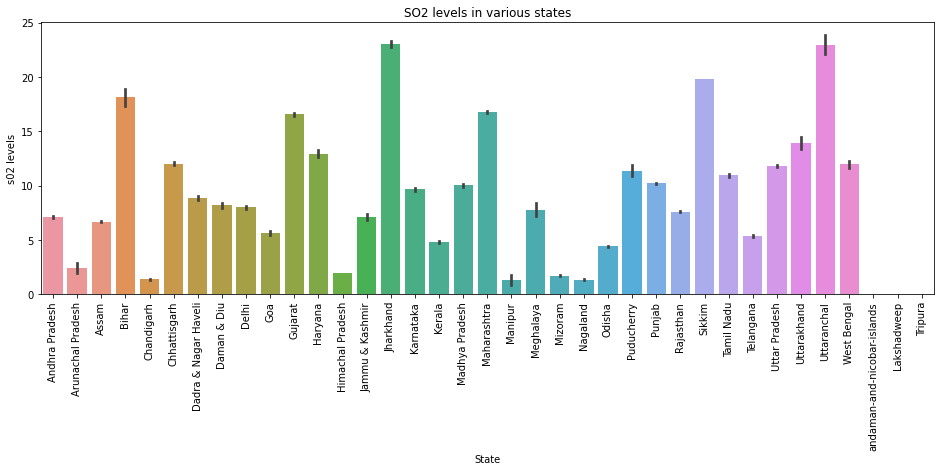

In [70]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y='so2', data=df)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('s02 levels')
plt.title("SO2 levels in various states")

In [16]:
state_so2=df[['so2','state']].groupby('state').mean().sort_values('so2')


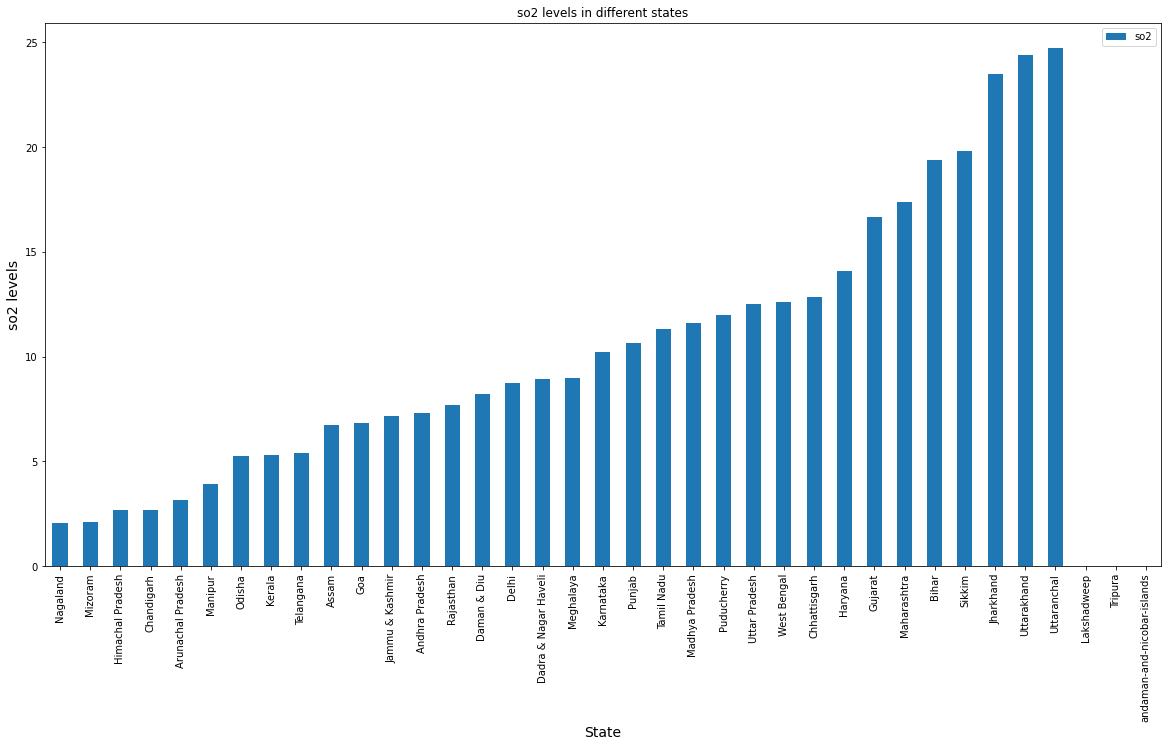

In [17]:
plt.rcParams['figure.figsize']=(20,10)
state_so2.plot.bar()
plt.xlabel('State', fontsize=14)
plt.ylabel('so2 levels', fontsize=14)
plt.title('so2 levels in different states')
plt.show()


In [20]:
state_spm=df[['spm','state']].groupby('state').mean().sort_values('spm')

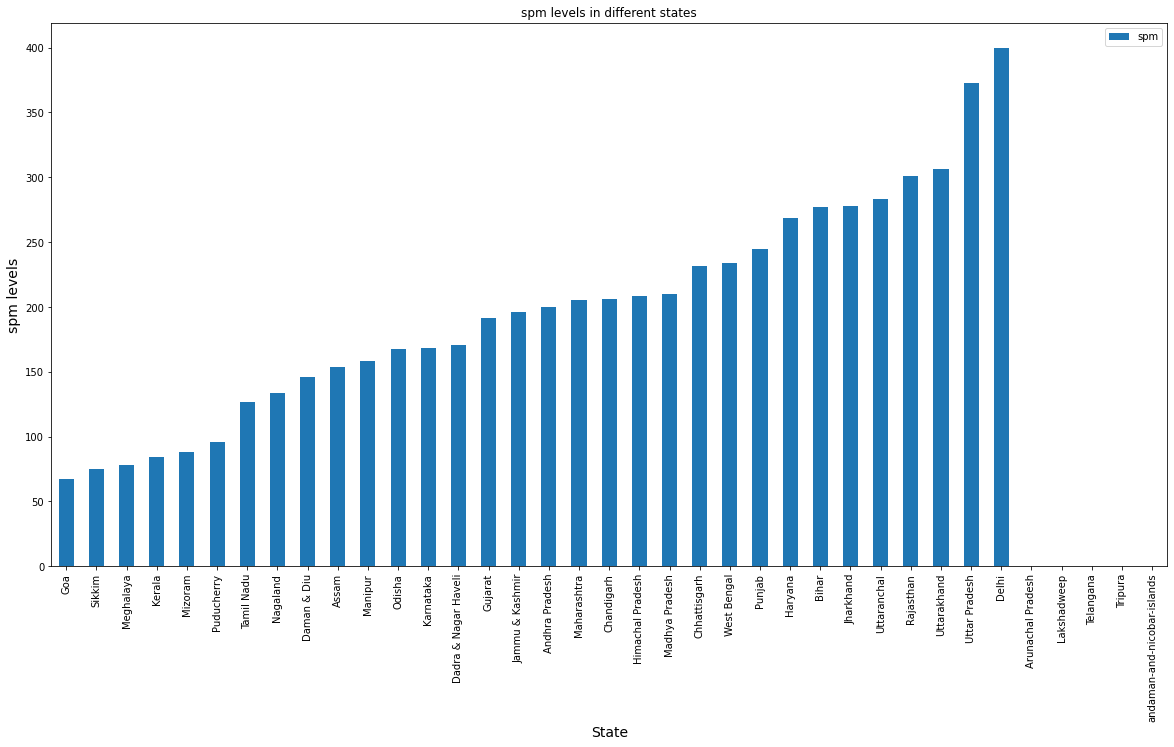

In [21]:
plt.rcParams['figure.figsize']=(20,10)
state_spm.plot.bar()
plt.xlabel('State', fontsize=14)
plt.ylabel('spm levels', fontsize=14)
plt.title('spm levels in different states')
plt.show()

In [ ]:
state_no2=df[['no2','state']].groupby('state').mean().sort_values('no2')


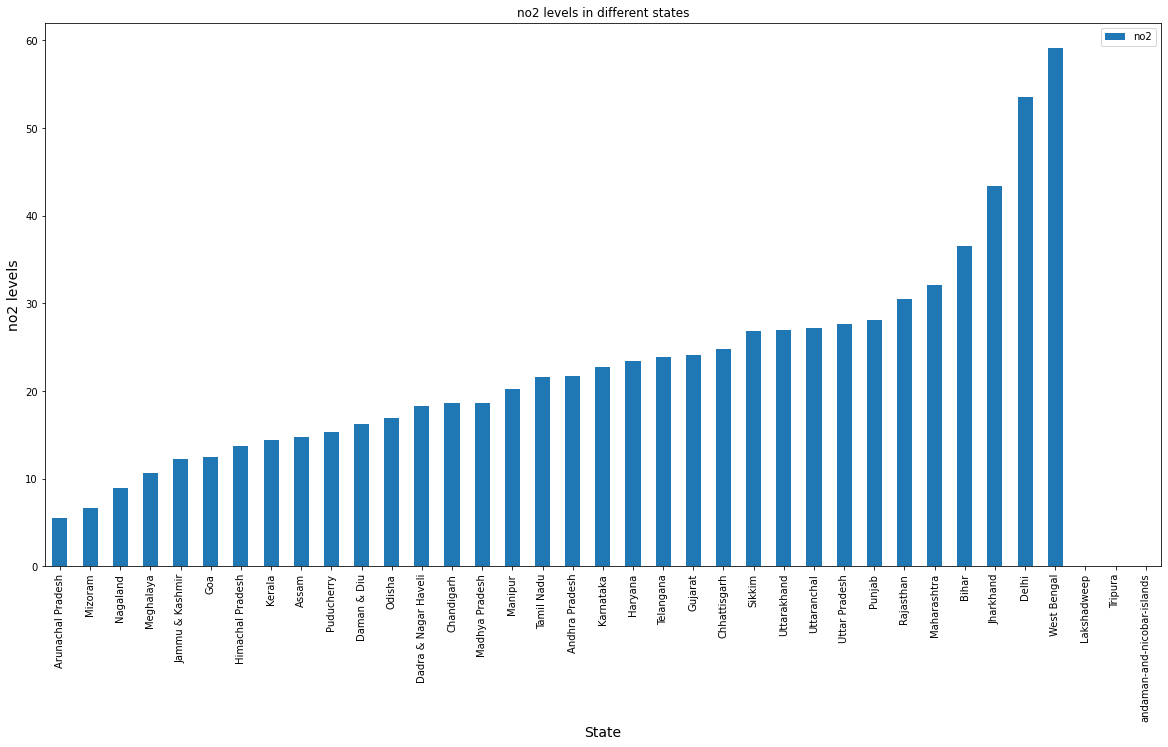

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
state_no2.plot.bar()
plt.xlabel('State', fontsize=14)
plt.ylabel('no2 levels', fontsize=14)
plt.title('no2 levels in different states')
plt.show()

##Handling null values##

In [22]:
null_values=df.isna().sum().sort_values(ascending=False)
null_values

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [23]:
null_values_pct=(df.isna().sum()/df.isna().count()*100).sort_values(ascending=False)

In [24]:
missing_data_pct=pandas.concat([null_values, null_values_pct], axis=1, keys=['Total', 'Percent'])
missing_data_pct

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [25]:
df.drop(['agency', 'stn_code', 'date', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)

In [26]:
df.isna().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [27]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####Imputing the categorical and numerical data with mode and 0 respectively#####

In [28]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [29]:
df.fillna(0, inplace=True)

In [30]:
df.isna().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

#Calculating the Air Quality Index#

#####Pollutant index for s02#####

In [31]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


#####Pollutant index for no2

In [32]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


#####Pollutant index for rspm

In [33]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


#####Pollutant index for spm

In [34]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


###AQI

In [35]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


#####Defining AQI range

In [36]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.sample(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
100355,Gujarat,Surat,Industrial Area,18.0,14.0,110.0,0.0,21.0,22.500,17.500,0.0,0.000000,22.500000,Good
95591,Gujarat,Ahmedabad,Industrial Area,11.0,17.0,57.0,0.0,0.0,13.750,21.250,0.0,0.000000,21.250000,Good
319397,Rajasthan,Alwar,"Residential, Rural and other Areas",12.6,73.6,0.0,325.0,0.0,15.750,92.000,0.0,275.000000,275.000000,Unhealthy
145507,Karnataka,Mysore,"Residential, Rural and other Areas",12.0,24.0,52.0,0.0,0.0,15.000,30.000,0.0,0.000000,30.000000,Good
44207,Assam,Guwahati,"Residential, Rural and other Areas",11.0,20.0,129.0,0.0,0.0,13.750,25.000,0.0,0.000000,25.000000,Good
268544,Nagaland,Kohima,"Residential, Rural and other Areas",2.0,6.2,123.0,0.0,0.0,2.500,7.750,0.0,0.000000,7.750000,Good
236359,Maharashtra,Sangli,"Residential, Rural and other Areas",11.0,26.0,42.0,0.0,0.0,13.750,32.500,0.0,0.000000,32.500000,Good
195909,Madhya Pradesh,Gwalior,"Residential, Rural and other Areas",14.0,29.0,219.0,0.0,88.0,17.500,36.250,0.0,0.000000,36.250000,Good
326777,Rajasthan,Jodhpur,Industrial Areas,6.4,24.7,167.0,440.0,0.0,8.000,30.875,0.0,402.325581,402.325581,Hazardous
90088,Gujarat,Ahmedabad,Residential and others,14.3,21.5,60.0,157.0,0.0,17.875,26.875,0.0,138.000000,138.000000,Poor


#Machine Learning

##Splitting the Data

In [37]:
X=df[['SOi', 'Noi', 'Rpi', 'SPMi']]
y=df['AQI']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=40)

##Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
regressor_lr=LinearRegression()
regressor_lr.fit(X_train,y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

In [41]:
y_train_pred_lr=regressor_lr.predict(X_train)
RMSE_train_lr=(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lr)))
print("RMSE_train: ", RMSE_train_lr)
print("R2_train: ", regressor_lr.score(X_train,y_train))

RMSE_train:  13.571486898199216
R2_train:  0.9849838928224641


In [42]:
y_test_pred_lr=regressor_lr.predict(X_test)
RMSE_test_lr=(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lr)))
print("RMSE_test: ", RMSE_test_lr)
print("R2_test: ", regressor_lr.score(X_test,y_test))

RMSE_test:  13.72094610303603
R2_test:  0.9846043362361925


##Decision Tree regression

In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt=DecisionTreeRegressor()
regressor_dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [44]:
y_train_pred_dt=regressor_dt.predict(X_train)
RMSE_train_dt=(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_dt)))
print("RMSE_train: ", RMSE_train_dt)
print("R2_train: ", regressor_dt.score(X_train,y_train))

RMSE_train:  2.2347109770149655e-13
R2_train:  1.0


In [45]:
y_test_pred_dt=regressor_dt.predict(X_test)
RMSE_test_dt=(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_dt)))
print("RMSE_train: ", RMSE_test_dt)
print("R2_train: ", regressor_dt.score(X_test,y_test))

RMSE_train:  1.3555258286684089
R2_train:  0.9998497391313022


##Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
y_train_pred_rf=regressor_rf.predict(X_train)
RMSE_train_rf=(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf)))
print("RMSE_train: ", RMSE_train_rf)
print("R2_train: ", regressor_rf.score(X_train,y_train))

RMSE_train:  0.44145168599628076
R2_train:  0.9999841120137422


In [48]:
y_test_pred_rf=regressor_rf.predict(X_test)
RMSE_test_rf=(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf)))
print("RMSE_train: ", RMSE_test_rf)
print("R2_train: ", regressor_rf.score(X_test,y_test))

RMSE_train:  1.1364165384779068
R2_train:  0.9998943899150838


####Out of all the regression models performed on the dataset, the linear regression model has by far given the best results###


##Classification Methods

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [51]:
X2=df[['SOi', 'Noi', 'Rpi', 'SPMi']]
y2=df['AQI_Range']

In [52]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2,y2, test_size=0.33, random_state=40)

###Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
classifier_lr=LogisticRegression()
classifier_lr.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [55]:
y2_train_pred_lr=classifier_lr.predict(X2_train)
print("Accuracy of model: ", accuracy_score(y2_train,y2_train_pred_lr))

Accuracy of model:  0.7287350101217002


In [56]:
y2_test_pred_lr=classifier_lr.predict(X2_test)
print("Accuracy of model: ", accuracy_score(y2_test,y2_test_pred_lr))

Accuracy of model:  0.7294551270906499


In [57]:
classifier_lr.predict([[700, 300, 75, 500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['Moderate'], dtype=object)

###Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier()
classifier_rf.fit(X2_train,y2_train)

RandomForestClassifier()

In [59]:
y2_train_pred_rf=classifier_rf.predict(X2_train)
print("Accuracy of model: ", accuracy_score(y2_train,y2_train_pred_rf))

Accuracy of model:  0.9999965747207541


In [60]:
y2_test_pred_rf=classifier_rf.predict(X2_test)
print("Accuracy of model: ", accuracy_score(y2_test,y2_test_pred_rf))

Accuracy of model:  0.9998052783476477


In [61]:
classifier_rf.predict([[700, 300, 75, 500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Hazardous'], dtype=object)

###K-Nearest Neighbors

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier()
classifier_knn.fit(X2_train,y2_train)

KNeighborsClassifier()

In [63]:
y2_train_pred_knn=classifier_knn.predict(X2_train)
print("Accuracy of model: ", accuracy_score(y2_train,y2_train_pred_knn))

Accuracy of model:  0.9982873603770548


In [64]:
y2_test_pred_knn=classifier_knn.predict(X2_test)
print("Accuracy of model: ", accuracy_score(y2_test,y2_test_pred_knn))

Accuracy of model:  0.9967592753572795


In [65]:
classifier_knn.predict([[700, 300, 75, 500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Hazardous'], dtype=object)

###Decision Tree Classification

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier()
classifier_dt.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [67]:
y2_train_pred_dt=classifier_dt.predict(X2_train)
print("Accuracy of model: ", accuracy_score(y2_train,y2_train_pred_dt))

Accuracy of model:  1.0


In [68]:
y2_test_pred_dt=classifier_dt.predict(X2_test)
print("Accuracy of model: ", accuracy_score(y2_test,y2_test_pred_dt))

Accuracy of model:  0.9998539587607358


In [69]:
classifier_dt.predict([[700, 300, 75, 500]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Hazardous'], dtype=object)

####The KNN classifier has so far performed well on our dataset